In [49]:
#Read data
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('E:\ML intern\Task 2/archive\Mall_Customers.csv')
df.sample(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
96,97,Female,47,60,47
6,7,Female,35,18,6


In [50]:
# Check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [51]:
#To ensure there is no wrong data
df.describe().round(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


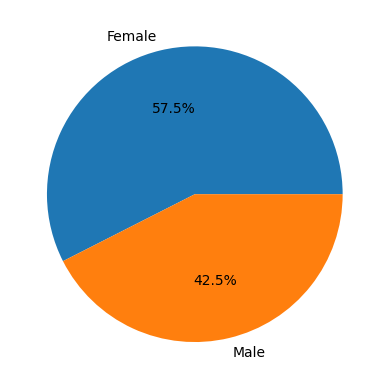

In [52]:
# male vs female 
Gender_sum = df.groupby('Gender').sum()
plt.pie(Gender_sum['Spending Score (1-100)'], labels=Gender_sum.index, autopct='%1.1f%%')
plt.show()

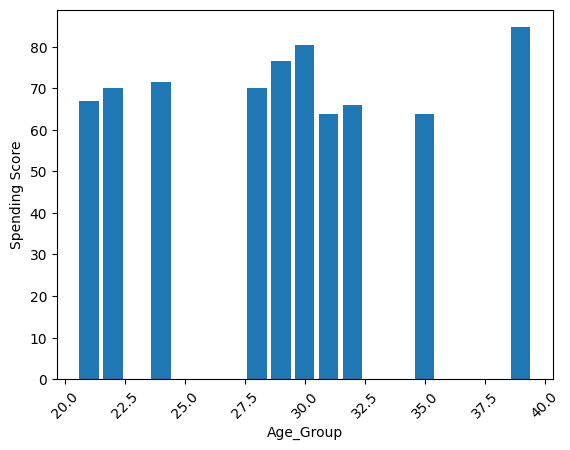

In [53]:
# score for different ages
Age_Score = df.groupby('Age')['Spending Score (1-100)'].mean().nlargest(10) 
plt.xlabel('Age_Group') 
plt.ylabel('Spending Score') 
plt.bar(Age_Score.index, Age_Score.values) 
plt.xticks(rotation=45) 
plt.show()

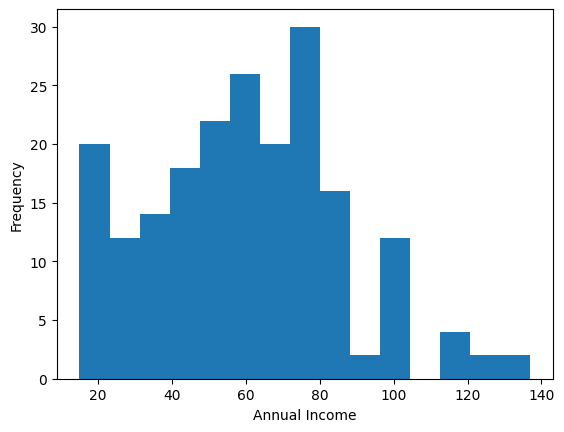

In [54]:
# Annual Income
plt.hist(df['Annual Income (k$)'], bins=15) 
plt.xlabel('Annual Income') 
plt.ylabel('Frequency') 
plt.show()

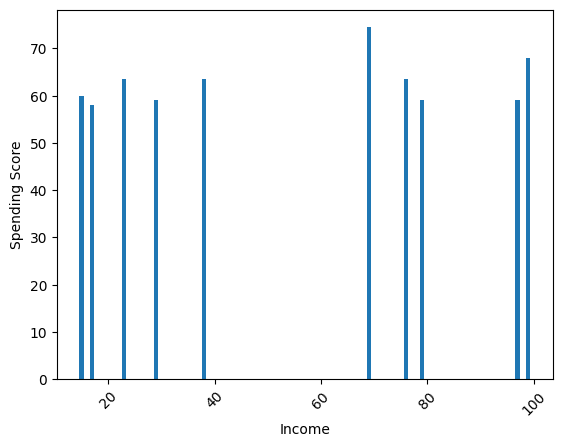

In [55]:
# Spending Score for different income
Income = df.groupby('Annual Income (k$)')['Spending Score (1-100)'].mean().nlargest(10) 
plt.xlabel('Income') 
plt.ylabel('Spending Score') 
plt.bar(Income.index, Income.values) 
plt.xticks(rotation=45) 
plt.show()

In [56]:
df1 = df[['Annual Income (k$)','Spending Score (1-100)']]

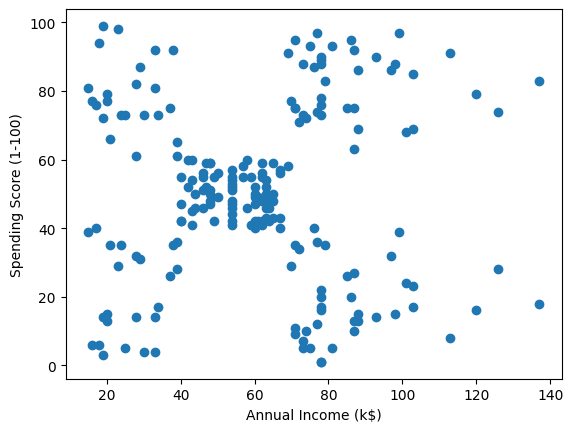

In [57]:
# Annual Income and Spending Score cluster
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)']) 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.show()

In [58]:
no_k = {}

for k in range(1,8):
    km = KMeans(n_clusters=k, init ='k-means++',max_iter=1500)
    km = km.fit(df1)
    no_k[k] = km.inertia_


C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

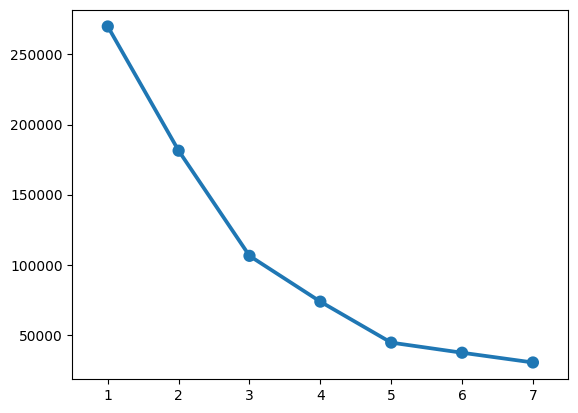

In [59]:
#  number of clusters
sns.pointplot(x=list(no_k.keys()),y= list(no_k.values()))
plt.show()

In [60]:
model = KMeans(n_clusters=5, init='k-means++',max_iter=1000)
model.fit(df1)

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=1000, n_clusters=5)

In [61]:
print(model.cluster_centers_)

[[88.2        17.11428571]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


In [62]:
center = model.cluster_centers_
df1_cluster = df1.copy()
df1_cluster['cluster'] = model.fit_predict(df1)

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [63]:
df1_cluster.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,1
1,15,81,4
2,16,6,1
3,16,77,4
4,17,40,1


In [64]:
color = ['blue','green','black','gold','gray']
df1_cluster['color']= df1_cluster['cluster'].map(lambda p:color[p])

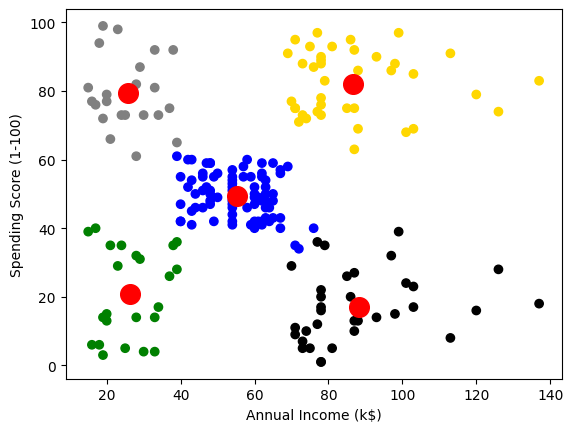

In [65]:
# clustering
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'],c=df1_cluster['color']) 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.scatter(center[:,0],center[:,1],c='red',s=200)
plt.show()

In [66]:
print(center)

[[88.2        17.11428571]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


In [67]:
labels =model.labels_

In [68]:
silhouette_score(df1, labels)

0.553931997444648

In [69]:

silhouette = {}

for k in range(2,8):
    km =KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df1) 
    silhouette[k] =silhouette_score(df1, km.labels_)

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

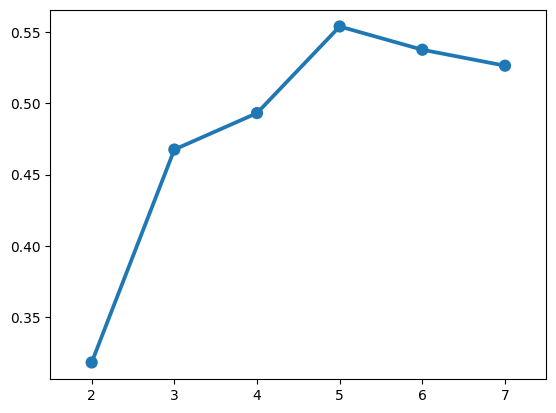

In [70]:
# check number of clusters again 
sns.pointplot(x=list(silhouette.keys()),y= list(silhouette.values()))
plt.show()